In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import numpy as np

from linearmodels.panel import PanelOLS
import datetime as dt

# Characteristics Random Forest



In [2]:
#decide which df to use
df = pd.read_csv("Dataframes/characteristics.csv")
#df = df.loc[:, ["Instrument", "Date", "Earnings Per Share - Actual Surprise", "Revenue - Actual", "Net Income after Tax"]]

df

,Instrument,Date,Earnings Per Share - Actual Surprise,Revenue - Actual,Enterprise Value,Market Capitalization,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,loss firm status
0,POOL.OQ,2022-10-01,4.196,1.615339e+09,1.406160e+10,1.259813e+10,2.383926,-9.164375,238539.0,-1
1,POOL.OQ,2022-07-01,1.503,2.055818e+09,1.556187e+10,1.405795e+10,2.749481,-21.661570,185584.0,-1
2,POOL.OQ,2022-04-01,34.342,1.412650e+09,1.843682e+10,1.696712e+10,3.422880,-25.160664,290897.0,-1
3,POOL.OQ,2022-01-01,40.267,1.035557e+09,2.384882e+10,2.268979e+10,4.504382,30.489705,82349.0,-1
4,POOL.OQ,2021-10-01,17.194,1.411448e+09,1.769954e+10,1.742020e+10,3.684400,-5.130322,157740.0,-1
...,...,...,...,...,...,...,...,...,...,...
19332,AVY.N,2014-01-01,1.471,1.583900e+09,5.553068e+09,4.877168e+09,0.920659,16.003852,157761.0,-1
19333,AVY.N,2013-10-01,8.095,1.504900e+09,5.029514e+09,4.273414e+09,0.903176,2.467620,236291.0,-1
19334,AVY.N,2013-07-01,1.068,1.552300e+09,5.436229e+09,4.258229e+09,0.906078,-0.054218,0.0,-1
19335,AVY.N,2013-04-01,2.482,1.498900e+09,5.459128e+09,4.309428e+09,0.895787,24.148726,0.0,-1


#### OLS Regression

In [3]:
#identifying outliers and replacing them with NA
summary_stats = df["Earnings Per Share - Actual Surprise"].describe()
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1
threshold = 7 #1.5 is standard threshold but we still want to keep enough variation in the data so setting threshol higher here
surprise_outliers_removed = df["Earnings Per Share - Actual Surprise"].loc[~((df["Earnings Per Share - Actual Surprise"] < (Q1 - threshold * IQR)) | (df["Earnings Per Share - Actual Surprise"] > (Q3 + threshold * IQR)))]
df_accuracy_new = df.copy()
df_accuracy_new["Earnings Per Share - Actual Surprise"] = surprise_outliers_removed
df_accuracy_new = df_accuracy_new.dropna(subset=["Earnings Per Share - Actual Surprise"])
#df_accuracy_new["Recommendation - Mean (1-5)"] = df_accuracy_new["Recommendation - Mean (1-5)"].fillna(0)
df_accuracy_new = df_accuracy_new.dropna()
df_accuracy_new.value_counts("loss firm status")


loss firm status
-1    17281
 1     1271
 0       14
dtype: int64

In [4]:
df_accuracy_new

,Instrument,Date,Earnings Per Share - Actual Surprise,Revenue - Actual,Enterprise Value,Market Capitalization,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,loss firm status
0,POOL.OQ,2022-10-01,4.196,1.615339e+09,1.406160e+10,1.259813e+10,2.383926,-9.164375,238539.0,-1
1,POOL.OQ,2022-07-01,1.503,2.055818e+09,1.556187e+10,1.405795e+10,2.749481,-21.661570,185584.0,-1
2,POOL.OQ,2022-04-01,34.342,1.412650e+09,1.843682e+10,1.696712e+10,3.422880,-25.160664,290897.0,-1
3,POOL.OQ,2022-01-01,40.267,1.035557e+09,2.384882e+10,2.268979e+10,4.504382,30.489705,82349.0,-1
4,POOL.OQ,2021-10-01,17.194,1.411448e+09,1.769954e+10,1.742020e+10,3.684400,-5.130322,157740.0,-1
...,...,...,...,...,...,...,...,...,...,...
19332,AVY.N,2014-01-01,1.471,1.583900e+09,5.553068e+09,4.877168e+09,0.920659,16.003852,157761.0,-1
19333,AVY.N,2013-10-01,8.095,1.504900e+09,5.029514e+09,4.273414e+09,0.903176,2.467620,236291.0,-1
19334,AVY.N,2013-07-01,1.068,1.552300e+09,5.436229e+09,4.258229e+09,0.906078,-0.054218,0.0,-1
19335,AVY.N,2013-04-01,2.482,1.498900e+09,5.459128e+09,4.309428e+09,0.895787,24.148726,0.0,-1


In [5]:
rescale = df_accuracy_new
#rescale["Earnings Per Share - Actual Surprise"] = MinMaxScaler().fit_transform(np.array(rescale["Earnings Per Share - Actual Surprise"]).reshape(-1,1))
rescale["Revenue - Actual"] = MinMaxScaler().fit_transform(np.array(rescale["Revenue - Actual"]).reshape(-1,1))
rescale["Enterprise Value"] = MinMaxScaler().fit_transform(np.array(rescale["Enterprise Value"]).reshape(-1,1))
rescale["Market Capitalization"] = MinMaxScaler().fit_transform(np.array(rescale["Market Capitalization"]).reshape(-1,1))
rescale["Enterprise Value To Sales (Daily Time Series Ratio)"] = MinMaxScaler().fit_transform(np.array(rescale["Enterprise Value To Sales (Daily Time Series Ratio)"]).reshape(-1,1))
rescale["3 Month Total Return"] = MinMaxScaler().fit_transform(np.array(rescale["3 Month Total Return"]).reshape(-1,1))
rescale["Volume"] = MinMaxScaler().fit_transform(np.array(rescale["Volume"]).reshape(-1,1))

rescale

,Instrument,Date,Earnings Per Share - Actual Surprise,Revenue - Actual,Enterprise Value,Market Capitalization,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,loss firm status
0,POOL.OQ,2022-10-01,4.196,0.065637,0.031045,0.004337,0.029064,0.235367,0.001361,-1
1,POOL.OQ,2022-07-01,1.503,0.068358,0.031540,0.004842,0.029495,0.195817,0.001059,-1
2,POOL.OQ,2022-04-01,34.342,0.064385,0.032488,0.005848,0.030290,0.184744,0.001660,-1
3,POOL.OQ,2022-01-01,40.267,0.062055,0.034274,0.007826,0.031566,0.360861,0.000470,-1
4,POOL.OQ,2021-10-01,17.194,0.064377,0.032245,0.006004,0.030598,0.248134,0.000900,-1
...,...,...,...,...,...,...,...,...,...,...
19332,AVY.N,2014-01-01,1.471,0.065443,0.028238,0.001667,0.027338,0.315017,0.000900,-1
19333,AVY.N,2013-10-01,8.095,0.064955,0.028065,0.001459,0.027317,0.272179,0.001348,-1
19334,AVY.N,2013-07-01,1.068,0.065247,0.028199,0.001453,0.027321,0.264198,0.000000,-1
19335,AVY.N,2013-04-01,2.482,0.064917,0.028207,0.001471,0.027308,0.340793,0.000000,-1


In [6]:
for_rf = rescale
#.iloc[0:38, :]
for_rf = for_rf.iloc[::-1].reset_index(drop=True)


# print the reversed DataFrame
for_rf

,Instrument,Date,Earnings Per Share - Actual Surprise,Revenue - Actual,Enterprise Value,Market Capitalization,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,loss firm status
0,AVY.N,2013-01-01,11.178,0.065123,0.027862,0.001166,0.027195,0.298034,0.001183,-1
1,AVY.N,2013-04-01,2.482,0.064917,0.028207,0.001471,0.027308,0.340793,0.000000,-1
2,AVY.N,2013-07-01,1.068,0.065247,0.028199,0.001453,0.027321,0.264198,0.000000,-1
3,AVY.N,2013-10-01,8.095,0.064955,0.028065,0.001459,0.027317,0.272179,0.001348,-1
4,AVY.N,2014-01-01,1.471,0.065443,0.028238,0.001667,0.027338,0.315017,0.000900,-1
...,...,...,...,...,...,...,...,...,...,...
18561,POOL.OQ,2021-10-01,17.194,0.064377,0.032245,0.006004,0.030598,0.248134,0.000900,-1
18562,POOL.OQ,2022-01-01,40.267,0.062055,0.034274,0.007826,0.031566,0.360861,0.000470,-1
18563,POOL.OQ,2022-04-01,34.342,0.064385,0.032488,0.005848,0.030290,0.184744,0.001660,-1
18564,POOL.OQ,2022-07-01,1.503,0.068358,0.031540,0.004842,0.029495,0.195817,0.001059,-1


In [7]:
corr_matrix = for_rf.corr()

# print the correlation matrix
print(corr_matrix)

                                                    Earnings Per Share - Actual Surprise  \
Earnings Per Share - Actual Surprise                                            1.000000   
Revenue - Actual                                                                0.013288   
Enterprise Value                                                                0.026257   
Market Capitalization                                                           0.025365   
Enterprise Value To Sales (Daily Time Series Ra...                             -0.004114   
3 Month Total Return                                                            0.112609   
Volume                                                                          0.019417   
loss firm status                                                               -0.002929   

                                                    Revenue - Actual  \
Earnings Per Share - Actual Surprise                        0.013288   
Revenue - Actual           

C:\Users\alexa\AppData\Local\Temp\ipykernel_13380\2473763400.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = for_rf.corr()


<AxesSubplot: >

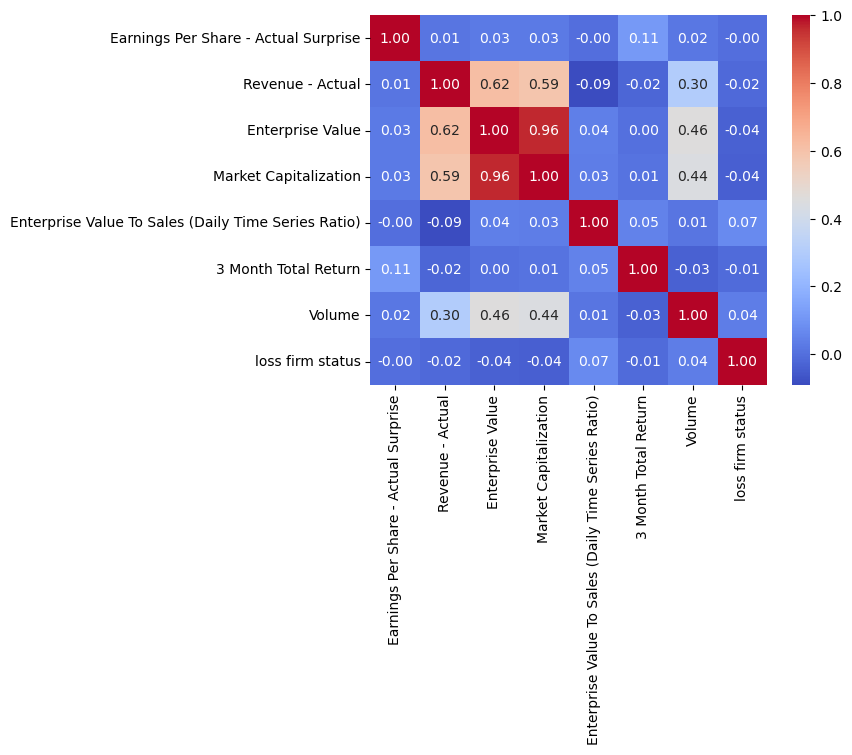

In [9]:
import seaborn as sns

# plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [8]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data

X_var_names = ["Revenue - Actual", "Enterprise Value", "Market Capitalization", "loss firm status",
               "Enterprise Value To Sales (Daily Time Series Ratio)", "3 Month Total Return", "Volume"]

# Define features and target
X = for_rf[X_var_names]
y = for_rf["Earnings Per Share - Actual Surprise"]

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model to the training data
rf.fit(X_train, y_train)

# predict the target variable on the test data
y_pred = rf.predict(X_test)

# evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 286.699077621646
